# PREDICTIVE MAINTAINANCE ANALYSIS

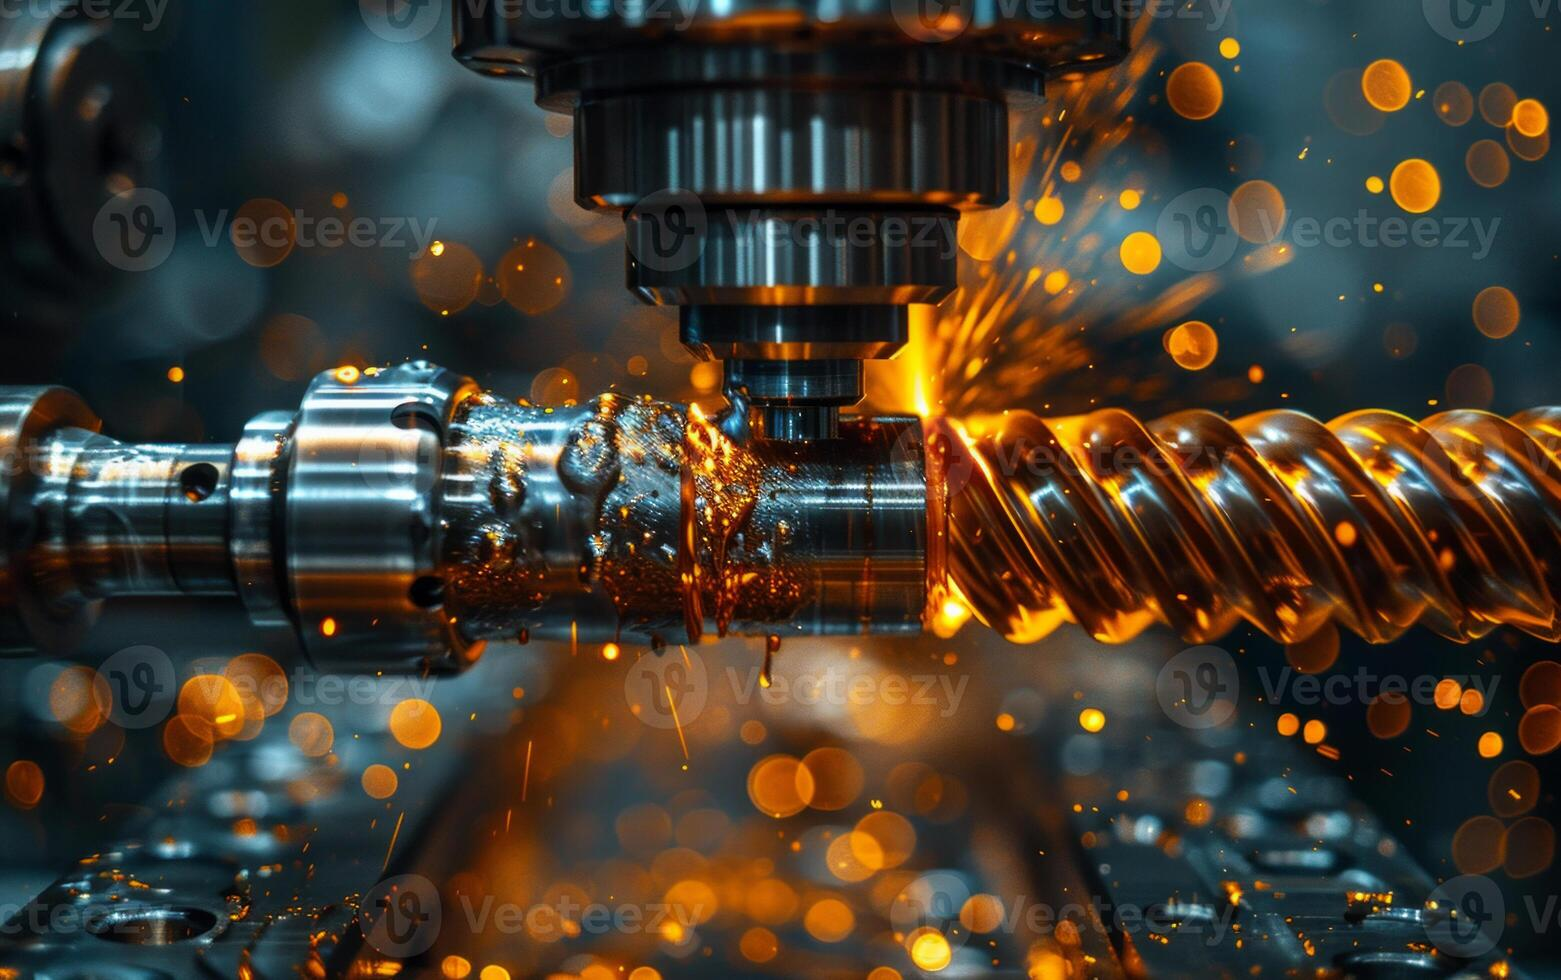

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Final Project/Predictive Maintainance analysis/IMG2.jpg',width=700,height=450)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/ML Final Project/Predictive Maintainance analysis/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


## Data Discription

In [6]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Final Project/Predictive Maintainance analysis/IMG1.jpg',width=700,height=450)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

<Axes: title={'center': 'Machine Failure'}, ylabel='count'>

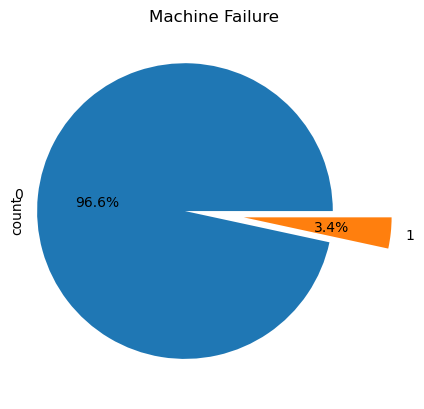

In [10]:
df['Target'].value_counts().plot.pie(explode = [0.2,0.2],autopct = '%.1f%%',title = "Machine Failure")

In [11]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

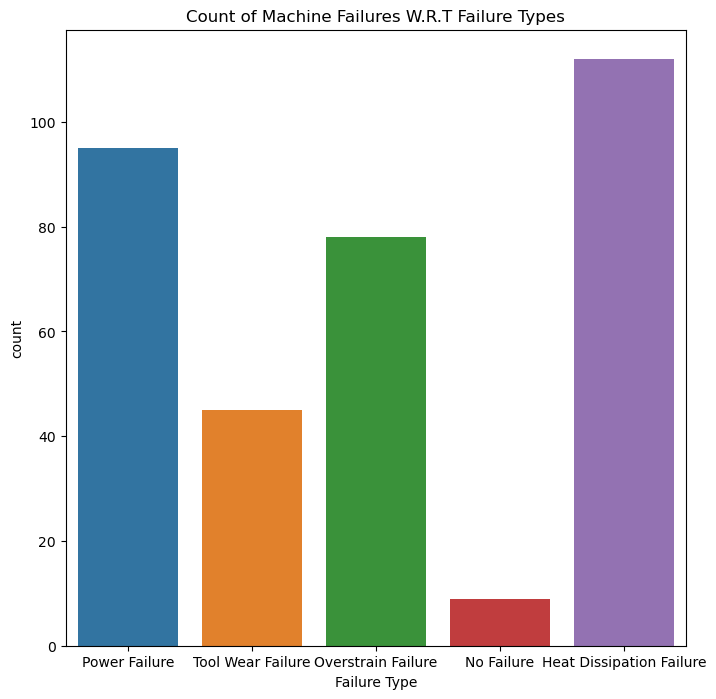

In [12]:
plt.figure(figsize = (8,8))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

In [13]:
df[(df['Target']== 1) & (df['Failure Type']== "No Failure")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [14]:
i = df[(df['Target']== 1) & (df['Failure Type']== "No Failure")].index
df.drop(i,axis=0,inplace=True) 

In [15]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")]
i

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [16]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")].index
df.drop(i,axis=0,inplace=True)

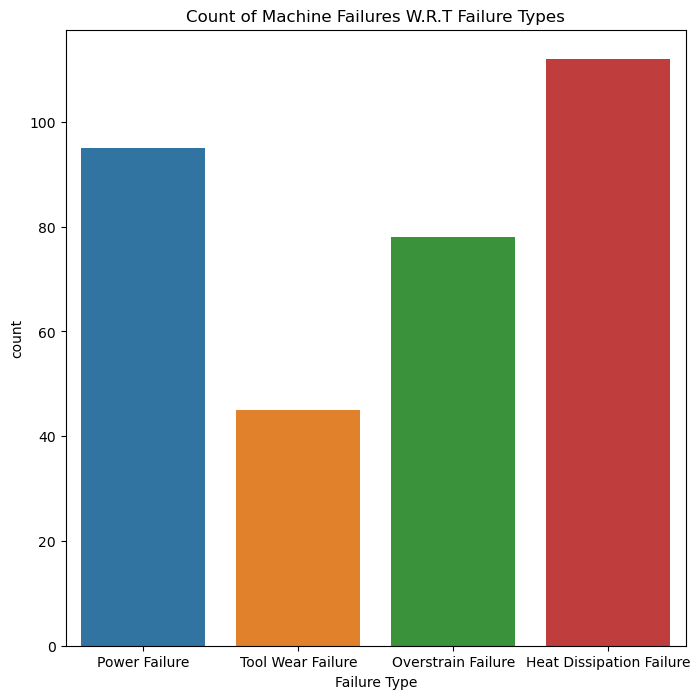

In [17]:
plt.figure(figsize = (8,8))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

<Axes: title={'center': 'Percentage of Product Type'}, ylabel='count'>

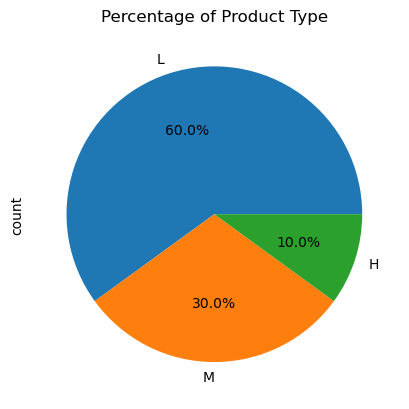

In [18]:
df['Type'].value_counts().plot(kind='pie',autopct='%.1f%%',title="Percentage of Product Type")

In [19]:
pd.DataFrame(df['Type'].value_counts())

,count
Type,
L,5984
M,2991
H,998


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9973 non-null   int64  
 1   Product ID               9973 non-null   object 
 2   Type                     9973 non-null   object 
 3   Air temperature [K]      9973 non-null   float64
 4   Process temperature [K]  9973 non-null   float64
 5   Rotational speed [rpm]   9973 non-null   int64  
 6   Torque [Nm]              9973 non-null   float64
 7   Tool wear [min]          9973 non-null   int64  
 8   Target                   9973 non-null   int64  
 9   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 857.1+ KB


In [21]:
df.select_dtypes([int,float]).corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117251,0.324345,-0.006514,0.002925,-0.010887,-0.023887
Air temperature [K],0.117251,1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066
Process temperature [K],0.324345,0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997
Rotational speed [rpm],-0.006514,0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042
Torque [Nm],0.002925,-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420
Tool wear [min],-0.010887,0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337
Target,-0.023887,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000


<Axes: >

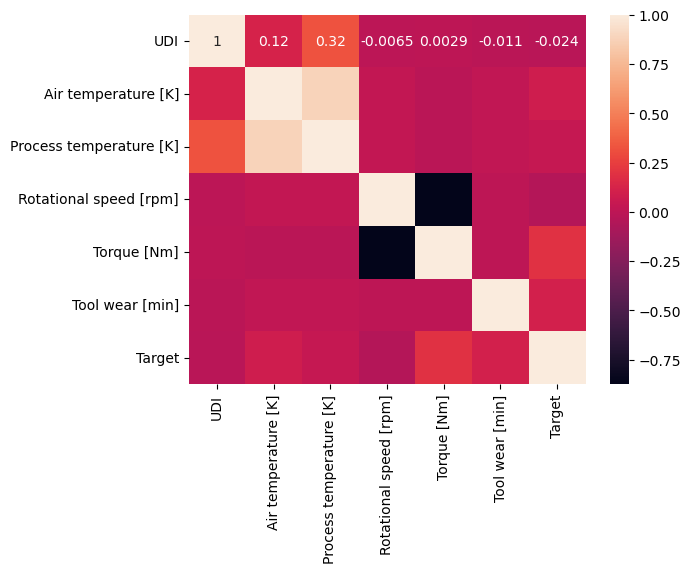

In [22]:
sns.heatmap((df.select_dtypes([int,float]).corr()),annot=True)

In [23]:
df.head(1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure


In [24]:
colname = df.iloc[:,2:8].columns

Type


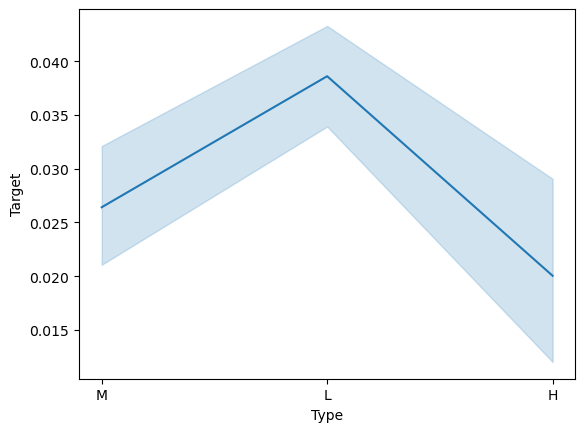

Air temperature [K]


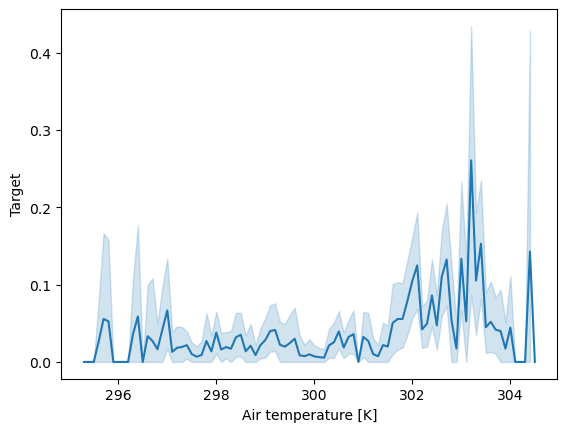

Process temperature [K]


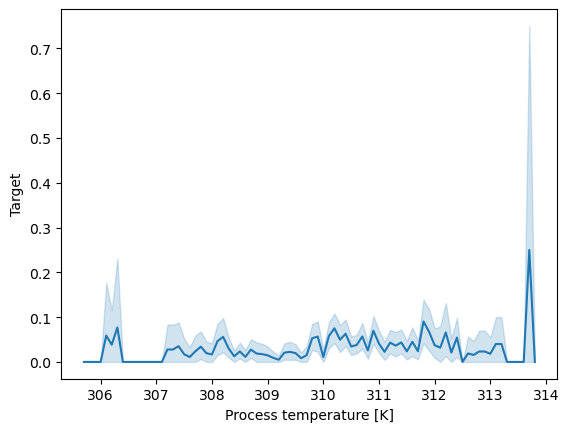

Rotational speed [rpm]


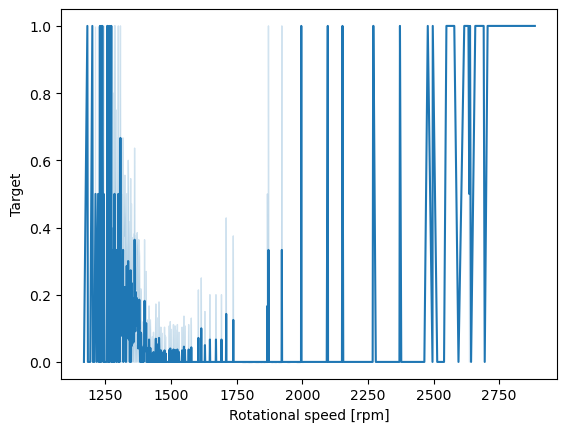

Torque [Nm]


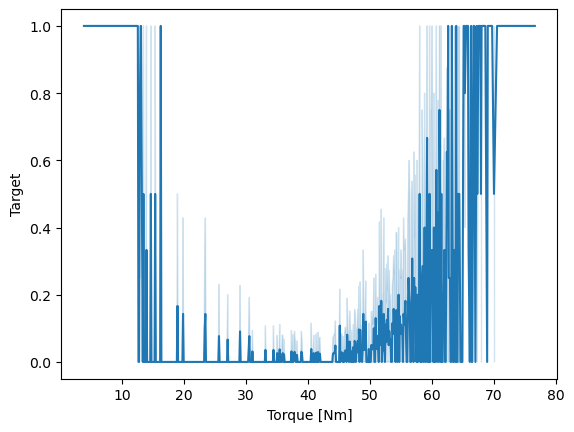

Tool wear [min]


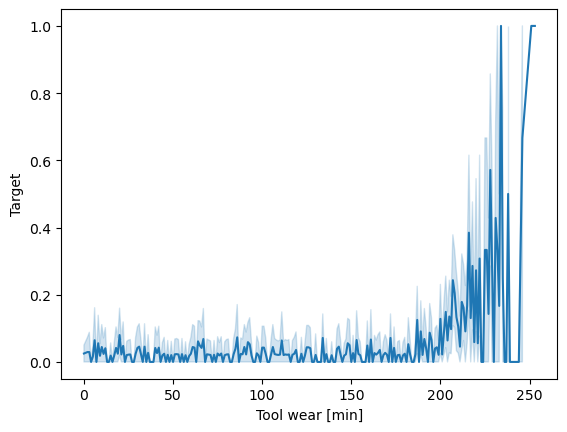

In [25]:
for i in df[colname]:
    print(i)

    sns.lineplot(x=df[i],y=df['Target'])
    plt.show()

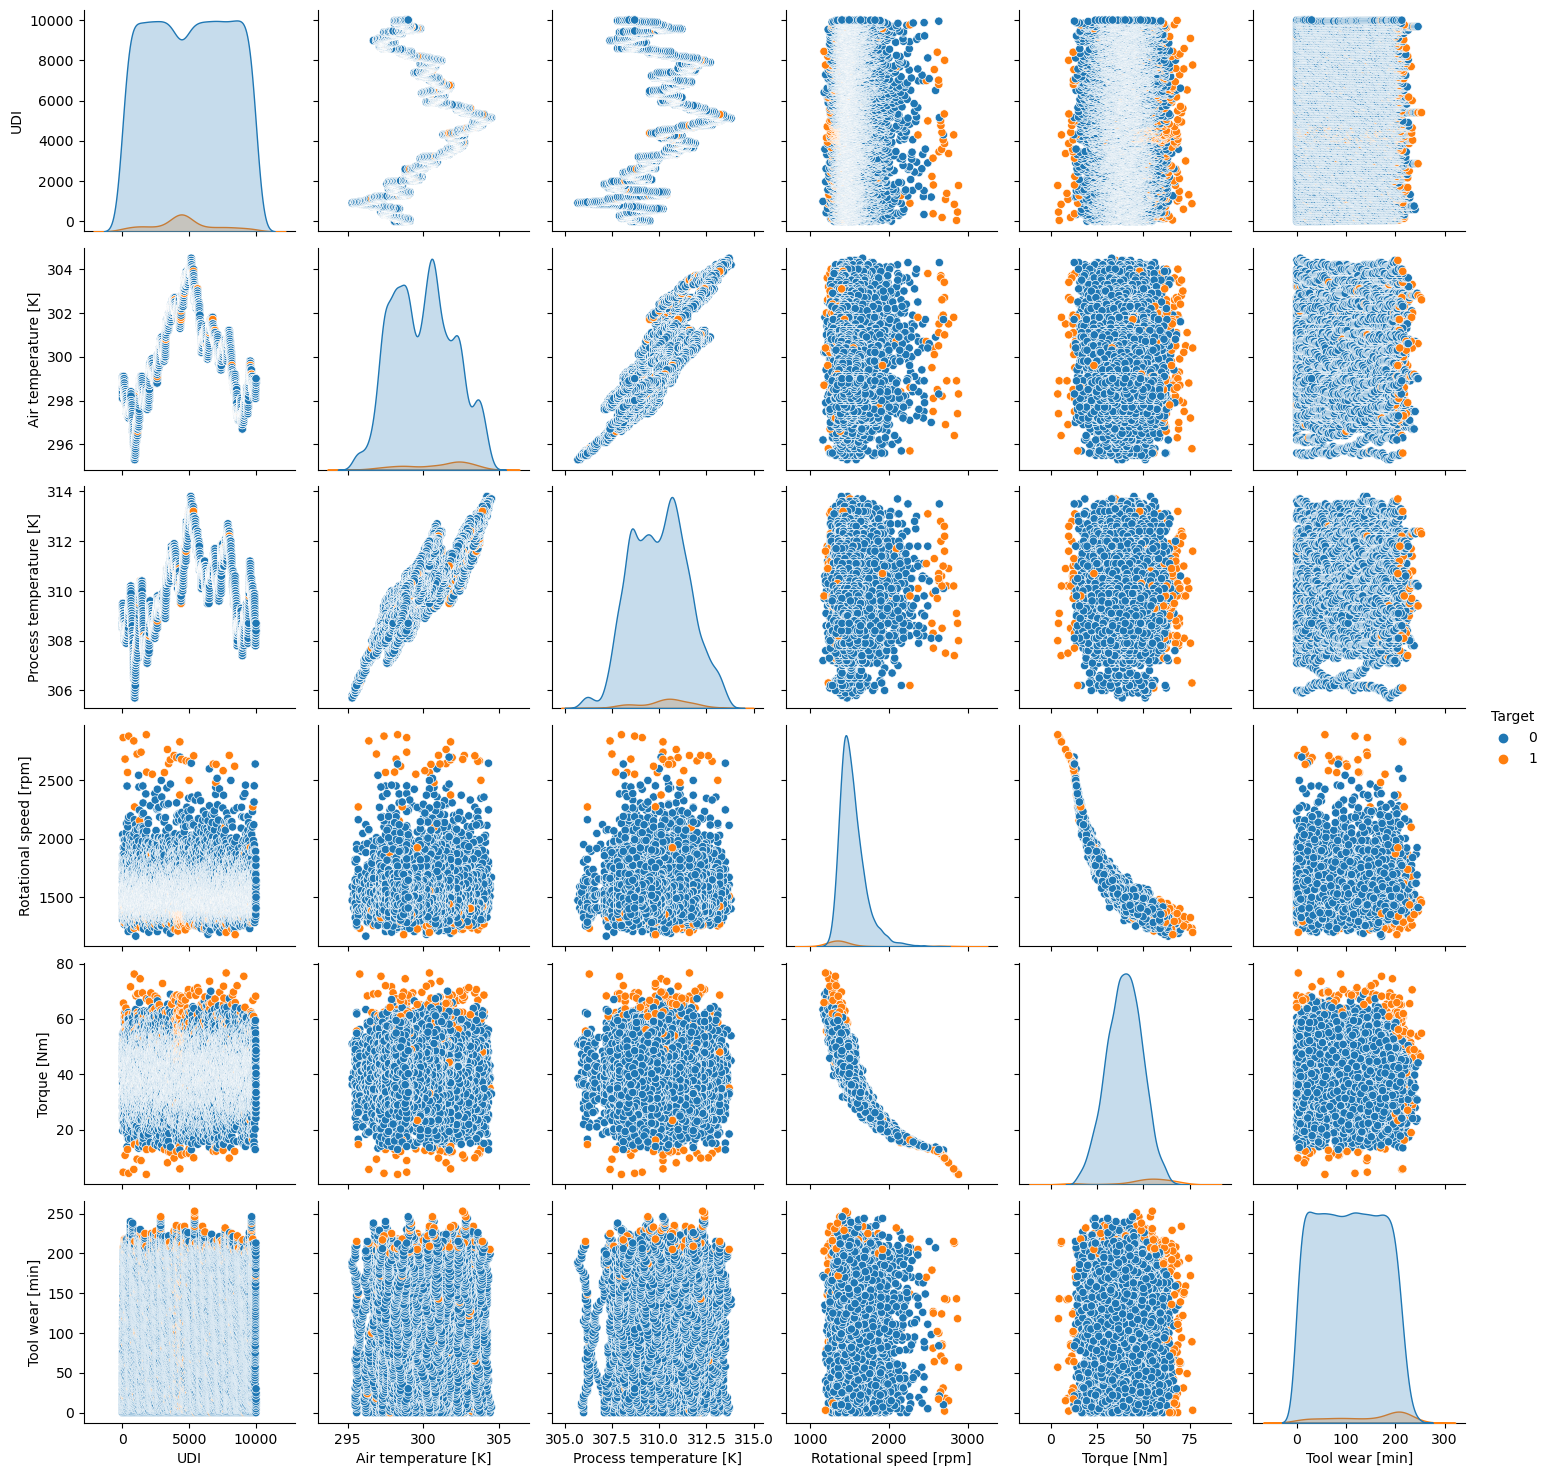

In [26]:
sns.pairplot(df,hue='Target')

In [27]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [28]:
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [29]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [30]:
df['Type'] = df['Type'].replace("L",0)
df['Type'] = df['Type'].replace("M",1)
df['Type'] = df['Type'].replace("H",2)

In [31]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


### Splitting the data into Features and Target

In [33]:
x = df.iloc[:,:-1]
x

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14
9996,2,298.9,308.4,1632,31.8,17
9997,1,299.0,308.6,1645,33.4,22
9998,2,299.0,308.7,1408,48.5,25


In [34]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 9973, dtype: int64

## Splitting The Data into Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.metrics import classification_report , accuracy_score 

In [38]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model   

### LogisticRegression()

In [40]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2903
           1       0.73      0.21      0.33        89

    accuracy                           0.97      2992
   macro avg       0.85      0.61      0.66      2992
weighted avg       0.97      0.97      0.97      2992



LogisticRegression()

### KNeighborsClassifier

In [42]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2903
           1       0.53      0.22      0.31        89

    accuracy                           0.97      2992
   macro avg       0.75      0.61      0.65      2992
weighted avg       0.96      0.97      0.97      2992



KNeighborsClassifier()

### DecisionTreeClassifier

In [44]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2903
           1       0.65      0.74      0.69        89

    accuracy                           0.98      2992
   macro avg       0.82      0.86      0.84      2992
weighted avg       0.98      0.98      0.98      2992



DecisionTreeClassifier()

In [45]:
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
0.9806149732620321


### Hyperparameter Tuning

In [47]:
for i in range(1,51):
    dt1 = DecisionTreeClassifier(max_depth=i )
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.9669117647058824
2 = 0.9759358288770054
3 = 0.9792780748663101
4 = 0.9782754010695187
5 = 0.9809491978609626
6 = 0.9832887700534759
7 = 0.9869652406417112
8 = 0.9859625668449198
9 = 0.982620320855615
10 = 0.9849598930481284
11 = 0.982620320855615
12 = 0.981951871657754
13 = 0.9836229946524064
14 = 0.982620320855615
15 = 0.9816176470588235
16 = 0.9809491978609626
17 = 0.9806149732620321
18 = 0.9802807486631016
19 = 0.9816176470588235
20 = 0.9789438502673797
21 = 0.9822860962566845
22 = 0.9809491978609626
23 = 0.9812834224598931
24 = 0.9812834224598931
25 = 0.9812834224598931
26 = 0.9816176470588235
27 = 0.9829545454545454
28 = 0.9799465240641712
29 = 0.9802807486631016
30 = 0.9809491978609626
31 = 0.9802807486631016
32 = 0.9812834224598931
33 = 0.9812834224598931
34 = 0.9822860962566845
35 = 0.9812834224598931
36 = 0.9792780748663101
37 = 0.9806149732620321
38 = 0.9802807486631016
39 = 0.9832887700534759
40 = 0.9822860962566845
41 = 0.9806149732620321
42 = 0.9816176470588235
43 = 

In [48]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(xtrain,ytrain)
    ypred = dt2.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.9812834224598931
3 = 0.9829545454545454
4 = 0.9816176470588235
5 = 0.9822860962566845
6 = 0.982620320855615
7 = 0.9822860962566845
8 = 0.982620320855615
9 = 0.982620320855615
10 = 0.9822860962566845
11 = 0.9829545454545454
12 = 0.981951871657754
13 = 0.981951871657754
14 = 0.981951871657754
15 = 0.982620320855615
16 = 0.9822860962566845
17 = 0.9822860962566845
18 = 0.9822860962566845
19 = 0.983957219251337
20 = 0.983957219251337
21 = 0.9846256684491979
22 = 0.9849598930481284
23 = 0.9849598930481284
24 = 0.9846256684491979
25 = 0.983957219251337
26 = 0.983957219251337
27 = 0.9846256684491979
28 = 0.9849598930481284
29 = 0.9849598930481284
30 = 0.9849598930481284
31 = 0.9842914438502673
32 = 0.9849598930481284
33 = 0.9849598930481284
34 = 0.9859625668449198
35 = 0.9852941176470589
36 = 0.9846256684491979
37 = 0.9846256684491979
38 = 0.9846256684491979
39 = 0.9846256684491979
40 = 0.9846256684491979
41 = 0.9852941176470589
42 = 0.9852941176470589
43 = 0.9846256684491979
44 = 0.9852

In [49]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred = dt2.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.9816176470588235
3 = 0.9849598930481284
4 = 0.9869652406417112
5 = 0.9842914438502673
6 = 0.9859625668449198
7 = 0.9852941176470589
8 = 0.9846256684491979
9 = 0.9849598930481284
10 = 0.9866310160427807
11 = 0.9856283422459893
12 = 0.9869652406417112
13 = 0.9869652406417112
14 = 0.9869652406417112
15 = 0.9876336898395722
16 = 0.9852941176470589
17 = 0.9856283422459893
18 = 0.9846256684491979
19 = 0.9852941176470589
20 = 0.9852941176470589
21 = 0.9862967914438503
22 = 0.9862967914438503
23 = 0.9846256684491979
24 = 0.9846256684491979
25 = 0.983957219251337
26 = 0.983957219251337
27 = 0.9829545454545454
28 = 0.9816176470588235
29 = 0.9809491978609626
30 = 0.9809491978609626
31 = 0.9789438502673797
32 = 0.9789438502673797
33 = 0.9789438502673797
34 = 0.9752673796791443
35 = 0.9742647058823529
36 = 0.9739304812834224
37 = 0.973596256684492
38 = 0.973596256684492
39 = 0.973596256684492
40 = 0.973596256684492
41 = 0.973596256684492
42 = 0.973596256684492
43 = 0.973596256684492
44 = 0.97

In [50]:
dt4 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,min_samples_split=34)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2903
           1       0.83      0.73      0.78        89

    accuracy                           0.99      2992
   macro avg       0.91      0.86      0.89      2992
weighted avg       0.99      0.99      0.99      2992



DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=34)

In [51]:
print(dt4.score(xtrain,ytrain))
print(dt4.score(xtest,ytest))

0.9852456668099127
0.9876336898395722


In [52]:
x.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [64]:
def modeltest():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Air_temp = eval(input("Enter Air Temperature in K : "))
    Process_temp = eval(input("Enter Process Temperature in K : "))
    Rotational_speed = int(input("Enter Rotational Speed in RPM : "))
    Torque = eval(input("Enter Torque in Nm : "))
    Tool_wear = int(input("Enter Tool Wear in min : "))
    Temp_difference = Process_temp-Air_temp

    newx = [Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear]
    yp = dt4.predict([newx])[0]

    if yp == 1:
        print("Output: Machine is Failed")
        return yp
    else:
        print("Output: Machine is not Failed")
        return yp    

## Model testing

### Testing if our model is properly working or not.

## Here the machine should fail.

In [66]:
modeltest()

Enter type of product based on quality.
If Low, enter 0.
If Medium, enter 1.
If High, enter 2.
You entered :  1
Enter Air Temperature in K :  298.2
Enter Process Temperature in K :  308.5
Enter Rotational Speed in RPM :  2678
Enter Torque in Nm :  10.7
Enter Tool Wear in min :  86


Output: Machine is Failed


1

### Here the machine should not fail.

In [68]:
modeltest()

Enter type of product based on quality.
If Low, enter 0.
If Medium, enter 1.
If High, enter 2.
You entered :  2
Enter Air Temperature in K :  298.4
Enter Process Temperature in K :  308.9
Enter Rotational Speed in RPM :  1782
Enter Torque in Nm :  23.9
Enter Tool Wear in min :  24


Output: Machine is not Failed


0

# Prescriptive Analysis